In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import tqdm
import time
import pickle
import datetime

import torch
import sklearn.metrics

import dimod
import hybrid

from neal.sampler import SimulatedAnnealingSampler
from tabu import TabuSampler

%run ../modules/fm.ipynb
%run ../modules/qubo.ipynb
%run ../modules/trainer.ipynb
# %run ../modules/ortools.ipynb

%run ../modules/proteins.ipynb

plt.style.use('dark_background')

In [2]:
# pip install gxboost

### 2) FMQA Loop

#### FMQA

In [4]:
# Load Datasets and Regressors

DATASET_PATHES = {'f100': ['../chemistry/datasets/f100.csv', '../chemistry/datasets/f100r.csv'],
                  'm1': ['../chemistry/datasets/m1.csv', '../chemistry/datasets/m1r.csv'],
                  'x1': ['../chemistry/datasets/x1.csv', '../chemistry/datasets/x1r.csv'],
                  'x100': ['../chemistry/datasets/x100.csv', '../chemistry/datasets/x100r.csv']}

# DATASET_PATHES = {'f100': ['../chemistry/datasets/f100.csv'],
#                   'm1': ['../chemistry/datasets/m1.csv'],
#                   'x1': ['../chemistry/datasets/x1.csv']}

# REGRESSORS_PATH = '../chemistry/regressors.pkl'
REGRESSORS_PATH = '../chemistry/regressors_classic.pkl'


datasets = load_protein_datasets(DATASET_PATHES)

regressors = load_regressors(REGRESSORS_PATH)

Datasets loaded: f100 m1 x1 x100
Regressors loaded: f100 m1 x1 x100


#### One Hot FMQA Loop

In [5]:
# Initialize FMQA Loop

TARGET_PROTEIN = 'm1'

target_dataset = datasets[TARGET_PROTEIN]

splitter = Splitter(target_dataset, batch_size=100)

trainer = Trainer(splitter=splitter, embedding_dimensions=16)



# Offtarget binding energies

offtarget_proteins = set(datasets) - {TARGET_PROTEIN}

target_regressor = regressors[TARGET_PROTEIN]['regressor']
offtarget_regressors = [regressors[offtarget_protein]['regressor']
                        for offtarget_protein in offtarget_proteins]

offtarget_predictions = [offtarget_regressor.predict(target_dataset.fields) 
                         for offtarget_regressor in offtarget_regressors]

offtarget_binding_energies = np.vstack(offtarget_predictions).sum(axis=0) / len(offtarget_proteins)

initial_offtarget_binding_energies = offtarget_binding_energies

initial_target_energies = target_dataset.targets


total_iteration = 0

print("target_dataset.field_dimensions.shape:", target_dataset.field_dimensions.shape)

target_dataset.field_dimensions.shape: (110,)


Iteration 101/105
splitter.lengths: (85444, 10680, 10682)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 85.5k/85.5k [00:01<00:00, 66.8k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.5 0.5 0.  0.  0.5 0.5 0.  0.  0.5 0.  0.5 0.5 0.  0.5 0.  0.  0.5 0.
 0.  0.  0.  0.  0.  1.  0.  0.5 0.5 0.  0.  0.5 0.5 0.  0.  0.  0.5 0.5
 0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.
 0.5 0.  0.5 0.  0.5 0.5 0.  0.5 0.5 0.  0.5 0.  0.5 0.  0.5 0.5 0.  0.
 0.  0.  0.5 0.5 0.5 0.  0.  0.  0.  0.  0.5 1.  0.  0.  0.5 0.  0.5 0.5
 0.5 0.  1.  0.  0. ] 0.22105263157894736
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -17.30
Overall   target minimum energy:  -17.30

Iteration 102/105
splitter.lengths: (86244, 10780, 10782)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 86.3k/86.3k [00:01<00:00, 63.0k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.5 0.5 0.  0.  0.5 0.5 0.  0.5 0.  0.  0.  0.  0.  0.5 0.
 0.  0.  0.  0.5 0.  0.  1.5 0.5 0.5 0.  0.  0.5 0.5 1.  0.  0.  0.  0.
 0.5 0.  0.  0.5 0.  0.  0.  0.5 0.5 0.5 0.  0.5 0.  0.5 0.  0.  0.  0.
 0.  1.  0.  0.  0.5 0.  2.  0.5 0.5 0.  0.5 0.5 1.5 0.5 0.  0.5 0.  2.
 1.5 2.  0.  2.  1.  0.  0.  0. ] 0.35
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -17.30
Overall   target minimum energy:  -17.30

Iteration 103/105
splitter.lengths: (87044, 10880, 10882)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 87.1k/87.1k [00:01<00:00, 69.2k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.5 0.5 0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.
 0.5 1.  0.  0.  0.  0.  0.5 0.  0.5 0.5 0.  0.  0.  0.5 0.  0.  0.  0.
 0.  0.  0.5 0.  0.  0.5 0.5 0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.
 0.  2.  0.5 0.5 0.5 1.  1.  0.  0.  0.  0.  0.5 0.  0.  0.5 0.5 0.  0.
 1.  1. ] 0.25
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -17.30
Overall   target minimum energy:  -17.30

Iteration 104/105
splitter.lengths: (87844, 10980, 10982)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 87.9k/87.9k [00:01<00:00, 58.7k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.5 0.5 0.5 0.5
 0.  0.  0.  0.  0.5 0.5 0.  0.5 0.  0.  0.  0.5 0.5 0.  2.  0.  0.5 0.
 0.5 0.5 0.5 0.5 0.  1.  0.  0.  0.  0.  0.  0.  1.5 0.5 1.  0.5 0.  0.5
 0.5 0.  0.  0.5 1.  0.  0.  0.  0.  0.  1.  0.  0.5 0.5 0.  0.  1.  0.
 0.  1.5 0.  0.  0.  1.5 0.  0.  0.  1.5 0.5 1.  0.  1.  1.5 0.5 0.5 0. ] 0.3888888888888889
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -17.30
Overall   target minimum energy:  -17.30

Iteration 105/105
splitter.lengths: (88644, 11080, 11082)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 88.7k/88.7k [00:01<00:00, 59.3k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.5 0.5 0.  0.  0.5 0.  0.  0.  0.5 0.5 0.  0.  0.  0.5 0.  0.
 0.  0.5 0.  0.5 0.5 0.  0.5 0.  0.5 0.  0.5 0.5 0.  0.  0.5 0.5 0.5 0.
 0.  0.  0.5 0.5 0.  0.5 0.  0.5 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.5 1.  0.  0.5 0.  0.5 0.  0.  0.5 0.  1.5 0.  0.
 0.  0.5 0.5 0.  0.5 0.  1.  0.5 1.5 0.  0.  0.  0.  2.  0.5 0.5 1. ] 0.2808988764044944
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -17.30
Overall   target minimum energy:  -17.30



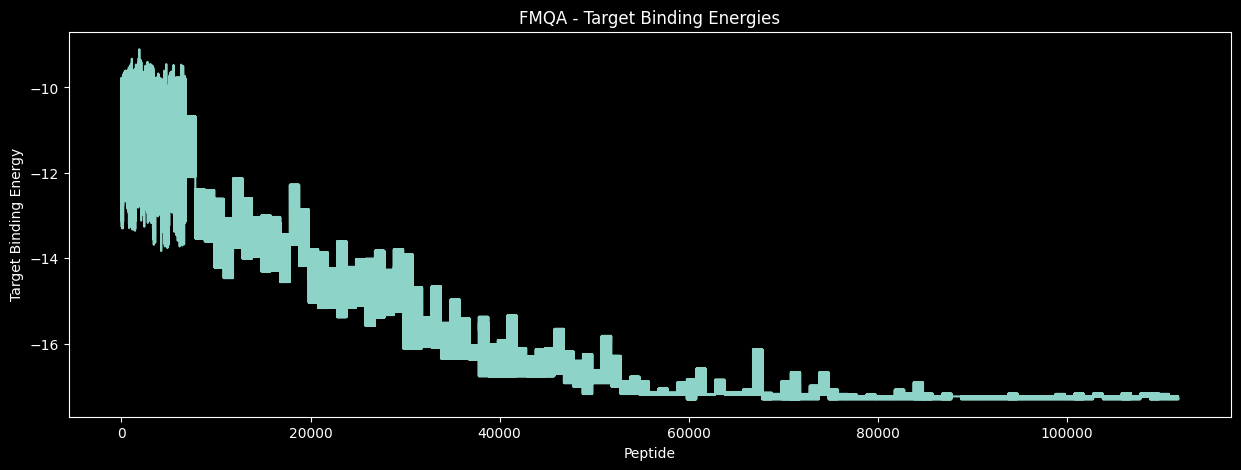

0     QKYWCLLFILISWIIVNVNDEY
1     QKYWCNLFRLISWIIANVNEEY
2     QKYWCLLFHLISXIIVNVNDEY
3     QKYWCNLFHLISXIIVNVNEEY
4     QKYWCLLFILISWIITNVNEEY
               ...          
84    GKYWCNQFILMSDIGANVNDVV
85    QAXWCLLXHLXSXEIVLCNEYY
86    QKYXCNLFILRSWIIANVNDYY
87    GPYWCNLFDLXSHIGACCNYDY
88    QKEWCNLFDLXSWXGTLCMEDY
Name: symbols, Length: 89, dtype: object


In [36]:
ITERATIONS_COUNT = 5

INITIAL_EPOCHS_COUNT = 100
EPOCHS_COUNT = 1
DATASET_SHARE = 1

TOP_SIZE = 10
SAMPLE_REPETITIONS_COUNT = 100

SHOTS_COUNT = 100
PENALTY_VALUE = 10
MAXIMIZE = False

SAMPLER = TabuSampler()
# SAMPLER = ORToolsSampler()
# SAMPLER = OneHotRandomSampler()
# SAMPLER = hybrid.KerberosSampler()

ORTOOLS_TIME_LIMIT = 10

total_iterations_count = total_iteration + ITERATIONS_COUNT


for iteration in range(ITERATIONS_COUNT):
    
    total_iteration += 1
    
    print(f"Iteration {total_iteration}/{total_iterations_count}")
    
    splitter = Splitter(target_dataset, batch_size=100,
                        dataset_share=DATASET_SHARE)
    
    print("splitter.lengths:", splitter.lengths)

    trainer = Trainer(splitter=splitter, 
                      embedding_dimensions=16,
                      model=trainer.model,
                      # optimizer=trainer.optimizer
                     )
       
    epochs_count = INITIAL_EPOCHS_COUNT if total_iteration == 1 else EPOCHS_COUNT
    
    trainer.train(epochs=epochs_count, validate=False)

    qubo = OneHotQubo(trainer=trainer,
                      penalty_value=PENALTY_VALUE,
                      maximize=MAXIMIZE)    

    sampling_results = SAMPLER.sample_qubo(Q=qubo.qubo_coefficients, 
                                           num_reads=SHOTS_COUNT,
                                           time_limit=ORTOOLS_TIME_LIMIT)
    
    aggregated_results = sampling_results.aggregate()
    filtered_results = aggregated_results.filter(pred=qubo.is_correct_one_hot)
    
    decoded_results = decode_sampling_results(qubo, target_dataset, filtered_results)
    
    if len(decoded_results):
        results = add_energies(decoded_results)
    else:
        print("No Samples")
        continue

    
    # Top results
    
    top_results = results.sort_values(by='binding_energy', ascending=True)[:TOP_SIZE]
    
    new_fields = np.vstack(top_results['bits'].to_numpy())
    new_targets = top_results['target_binding_energy'].to_numpy()
    

    # Append - Target binding energies
    
    target_dataset.append_records(new_fields, new_targets, SAMPLE_REPETITIONS_COUNT)
    
    
    # Append - Offtarget binding energies
    
    new_offtarget_binding_energies = np.tile(top_results['offtarget_binding_energy'], 
                                             (SAMPLE_REPETITIONS_COUNT, 1))
    
    offtarget_binding_energies = np.append(offtarget_binding_energies, new_offtarget_binding_energies)

    print(f"Initial   target minimum energy:  {initial_target_energies.min():.02f}")    
    print(f"Iteration target minimum energy:  {results['target_binding_energy'].min():.02f}")
    print(f"Overall   target minimum energy:  {target_dataset.targets.min():.02f}")
    print()
    # print(f"Initial   offtarget maximum energy: {initial_offtarget_binding_energies.max():.02f}")    
    # print(f"Iteration offtarget maximum energy: {results['offtarget_binding_energy'].max():.02f}")
    # print(f"Overall   offtarget maximum energy: {offtarget_binding_energies.max():.02f}")
    # print()
        
# Plots

plt.figure(figsize=(15, 5))
plt.title("FMQA - Target Binding Energies")
plt.xlabel("Peptide")
plt.ylabel("Target Binding Energy")

plt.plot(target_dataset.targets)
plt.show()

print(results.symbols)

# plt.figure(figsize=(15, 5))
# plt.title("FMQA - Offtarget Binding Energies")
# plt.xlabel("Peptide")
# plt.ylabel("Offtarget Binding Energy")

# plt.plot(offtarget_binding_energies)
# plt.show()

In [ ]:
# np.save('qubo_proteins.npy', qubo.coupling_matrix)

#### One Cold FMQA Loop

In [3]:
# Initialize FMQA Loop

TARGET_PROTEIN = 'm1'

target_dataset = datasets[TARGET_PROTEIN]

splitter = Splitter(target_dataset, batch_size=100)

model = OneColdFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=False
)

trainer = Trainer(splitter=splitter, model=model)

initial_target_energies = target_dataset.targets


# Offtarget binding energies

offtarget_proteins = set(datasets) - {TARGET_PROTEIN}

target_regressor = regressors[TARGET_PROTEIN]['regressor']
offtarget_regressors = [regressors[offtarget_protein]['regressor']
                        for offtarget_protein in offtarget_proteins]

offtarget_predictions = [offtarget_regressor.predict(target_dataset.fields) 
                         for offtarget_regressor in offtarget_regressors]

offtarget_binding_energies = np.vstack(offtarget_predictions).sum(axis=0) / len(offtarget_proteins)

initial_offtarget_binding_energies = offtarget_binding_energies

total_iteration = 0

print("target_dataset.field_dimensions.shape:", target_dataset.field_dimensions.shape)

target_dataset.field_dimensions.shape: (110,)


Iteration 101/105
splitter.lengths: (40804, 5100, 5102)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 40.9k/40.9k [00:00<00:00, 49.6k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.42
Overall   target minimum energy:  -16.40

Iteration 102/105
splitter.lengths: (41604, 5200, 5202)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 41.7k/41.7k [00:00<00:00, 50.7k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  1.  0.  0.  1.5 0.  0.5 0.  1.5 0.  0.  1.  0.
 1.5 0.  0.5 0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.5 0.  0.5] 0.2878787878787879
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.42
Overall   target minimum energy:  -16.42

Iteration 103/105
splitter.lengths: (42404, 5300, 5302)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 42.5k/42.5k [00:00<00:00, 52.8k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.5 0.5 0.5 1.  0.5 0.5 0.5 0.5 0.  0.5 0.  0.  0.5 1.  0.  1.  1.  1.
 0.  0.5 0.  0.  1.  0.5 1.  0.5 0.5 0.5 0.5 1.5 1.  0.5] 0.546875
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.46
Overall   target minimum energy:  -16.46

Iteration 104/105
splitter.lengths: (43204, 5400, 5402)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 43.3k/43.3k [00:00<00:00, 52.9k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  1.
 0.5] 0.14864864864864866
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.46
Overall   target minimum energy:  -16.46

Iteration 105/105
splitter.lengths: (44004, 5500, 5502)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 44.1k/44.1k [00:00<00:00, 56.2k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5] 0.018518518518518517
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.46
Overall   target minimum energy:  -16.46



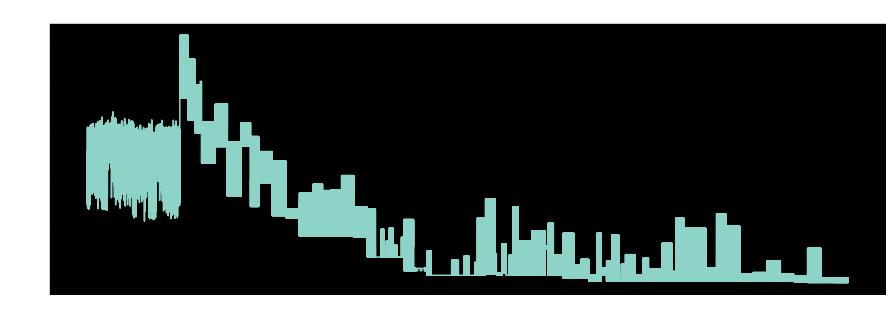

0     GQYWEEQFCVNFRIIHLLNEYY
1     QQYWEEQFEVNFSIGHLLNEYY
2     QQEWEEQFEVNFRIGHLLNEYY
3     QQYWEEQFCVNFRIGHLLNIEY
4     QQYWIYQFEVNFSEGHCLNEYE
5     QQYWCESFEVLFRIGHLLNIEY
6     QQYWEEQFEVNFRIGHKLNIYY
7     GQYWENQFCVNFSIIHLLNEYY
8     QQYWEEQFEVNFRIGHKQNEYY
9     IQEWCNQFNVLFRIGDLLNEYY
10    QQYWIEQFEVNFSIGHLLNEEY
11    QQYWEEQFEVNPREGHLLNEYY
12    QQYWYEQFEVNFRIGHKLNEEY
13    IQYWCEQFEVLHRIGHLLNEYY
14    QQYWCEQFYVNFRIGHLLNEEY
15    QQYWEEQFYVNFRIGHLLNIEY
16    GQYWEEQFEVLIRIGHLLNIYY
17    GQYWIEQFEYNFSIGHLLNLYY
18    QQYWENGFNVNGSIGHCLNIEE
19    GQYWGNQANYNFSIGDLLNAYY
20    SQYWENGFNVNFSIGHCLNIEE
21    QQYWDEQFEVNPREGHKLNEYY
22    GQYWCNQANYNFSIGHLLNAYY
23    GQYWCNQANYNFRIGHKLNFYY
24    QQYWIEIFEVNFSIGHCLNEEE
25    GQYWIYQASYNFRIGHLLNAYY
26    IQYWCNQANVNFSIGHLLXCYY
Name: symbols, dtype: object


In [ ]:
ITERATIONS_COUNT = 5

INITIAL_EPOCHS_COUNT = 100
EPOCHS_COUNT = 1
DATASET_SHARE = 1

TOP_SIZE = 10
SAMPLE_REPETITIONS_COUNT = 100

SHOTS_COUNT = 100
PENALTY_VALUE = 10
MAXIMIZE = False

SAMPLER = TabuSampler()
# SAMPLER = ORToolsSampler()
# SAMPLER = OneHotRandomSampler()
# SAMPLER = hybrid.KerberosSampler()

ORTOOLS_TIME_LIMIT = 10

total_iterations_count = total_iteration + ITERATIONS_COUNT


for iteration in range(ITERATIONS_COUNT):
    
    total_iteration += 1
    
    print(f"Iteration {total_iteration}/{total_iterations_count}")
    
    splitter = Splitter(target_dataset, batch_size=100,
                        dataset_share=DATASET_SHARE)
    
    print("splitter.lengths:", splitter.lengths)

    trainer = Trainer(splitter=splitter, model=trainer.model)
       
    epochs_count = INITIAL_EPOCHS_COUNT if total_iteration == 1 else EPOCHS_COUNT
    
    trainer.train(epochs=epochs_count, validate=False)

    qubo = OneColdQubo(trainer=trainer, maximize=MAXIMIZE)    

    sampling_results = SAMPLER.sample_qubo(Q=qubo.qubo_coefficients, 
                                           num_reads=SHOTS_COUNT,
                                           time_limit=ORTOOLS_TIME_LIMIT)
    
    aggregated_results = sampling_results.aggregate()
    
    decoded_results = one_cold_decode_sampling_results(qubo, target_dataset, aggregated_results)   
  

    if len(decoded_results):
        results = add_energies(decoded_results)
    else:
        print("No Samples")
        continue

    
    # Top results
    
    top_results = results.sort_values(by='binding_energy', ascending=True)[:TOP_SIZE]
    
    new_fields = np.vstack(top_results['bits'].to_numpy())
    new_targets = top_results['target_binding_energy'].to_numpy()
    

    # Append - Target binding energies
    
    target_dataset.append_records(new_fields, new_targets, SAMPLE_REPETITIONS_COUNT)
    
    
    # Append - Offtarget binding energies
    
    new_offtarget_binding_energies = np.tile(top_results['offtarget_binding_energy'], 
                                             (SAMPLE_REPETITIONS_COUNT, 1))
    
    offtarget_binding_energies = np.append(offtarget_binding_energies, new_offtarget_binding_energies)

    print(f"Initial   target minimum energy:  {initial_target_energies.min():.02f}")    
    print(f"Iteration target minimum energy:  {results['target_binding_energy'].min():.02f}")
    print(f"Overall   target minimum energy:  {target_dataset.targets.min():.02f}")
    print()
    # print(f"Initial   offtarget maximum energy: {initial_offtarget_binding_energies.max():.02f}")    
    # print(f"Iteration offtarget maximum energy: {results['offtarget_binding_energy'].max():.02f}")
    # print(f"Overall   offtarget maximum energy: {offtarget_binding_energies.max():.02f}")
    # print()
        
# Plots

plt.figure(figsize=(15, 5))
plt.title("FMQA - Target Binding Energies")
plt.xlabel("Peptide")
plt.ylabel("Target Binding Energy")

plt.plot(target_dataset.targets)
plt.show()

print(results.symbols)

# plt.figure(figsize=(15, 5))
# plt.title("FMQA - Offtarget Binding Energies")
# plt.xlabel("Peptide")
# plt.ylabel("Offtarget Binding Energy")

# plt.plot(offtarget_binding_energies)
# plt.show()

In [5]:
# np.save('qubo_proteins.npy', qubo.coupling_matrix)

#### FMQA Results

In [15]:
top_results = results.sort_values('binding_energy', ignore_index=True)

# top_results.to_csv('results_06_12_2022.csv')

top_results.drop(columns=['decimal', 'bits', 'num_occurrences'])

,samples,symbols,qubo_energy,target_binding_energy,offtarget_binding_energy,binding_energy
0,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWEEQFEVNFRIGHKQNEYY,-16.246276,-16.355515,-10.499178,-5.856337
1,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",GQYWEEQFEVLIRIGHLLNIYY,-16.212870,-16.296612,-10.525996,-5.770616
2,"[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...",IQEWCNQFNVLFRIGDLLNEYY,-16.245987,-16.462421,-10.939004,-5.523417
3,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWEEQFEVNFRIGHKLNIYY,-16.268166,-16.335552,-10.883296,-5.452256
4,"[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",IQYWCEQFEVLHRIGHLLNEYY,-16.223307,-16.258976,-10.834701,-5.424275
5,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...",QQEWEEQFEVNFRIGHLLNEYY,-16.316278,-16.462654,-11.043178,-5.419477
6,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",GQYWENQFCVNFSIIHLLNEYY,-16.258499,-16.354563,-10.935181,-5.419382
7,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWIEQFEVNFSIGHLLNEEY,-16.241596,-16.337914,-10.931443,-5.406470
8,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWEEQFYVNFRIGHLLNIEY,-16.213057,-16.404175,-11.038857,-5.365317
9,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",GQYWEEQFCVNFRIIHLLNEYY,-16.324631,-16.404175,-11.038857,-5.365317


#### Docking Results

In [17]:
docking_results = pd.read_csv('../chemistry/results/docking_results_19_12_2022.csv')

docking_results.head()

,peptide_index,peptide,target_binding_energy,tool,target,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
0,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,HPEPDOCK,m1,-231.9,-226.9,-222.7,-221.2,-219.6,-219.0,-217.8,-217.6,-216.5,-213.8
1,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,HPEPDOCK,f100,-208.4,-205.7,-201.0,-199.9,-198.6,-197.2,-196.9,-196.0,-194.8,-194.6
2,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,HPEPDOCK,x1,-231.9,-229.7,-226.4,-225.4,-224.0,-223.2,-223.0,-220.7,-220.5,-218.6
3,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,MDockPeP,m1,-220.5,-220.4,-218.6,-218.0,-218.0,-217.7,-217.5,-217.2,-216.9,-214.7
4,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,MDockPeP,f100,-225.0,-220.2,-216.4,-216.1,-214.6,-214.1,-212.5,-210.9,-210.7,-210.2


In [18]:
peptide_enegries = docking_results[['peptide', 'target_binding_energy']].drop_duplicates()

peptide_enegries

,peptide,target_binding_energy
0,GRYWCEQGQCLHMIGDNGNANW,-14.87
6,GRYWEGQGSCLHRIGDNGNCNW,-14.86
12,GQSADDIIAQLIRMADDHQAQY,-9.32
18,GQWKREIGALLRRPADKLNAQF,-9.10


In [19]:
docking_tools = docking_results['tool'].drop_duplicates()

docking_tools

0    HPEPDOCK
3    MDockPeP
Name: tool, dtype: object

In [20]:
targets = docking_results['target'].drop_duplicates()

targets

0      m1
1    f100
2      x1
Name: target, dtype: object

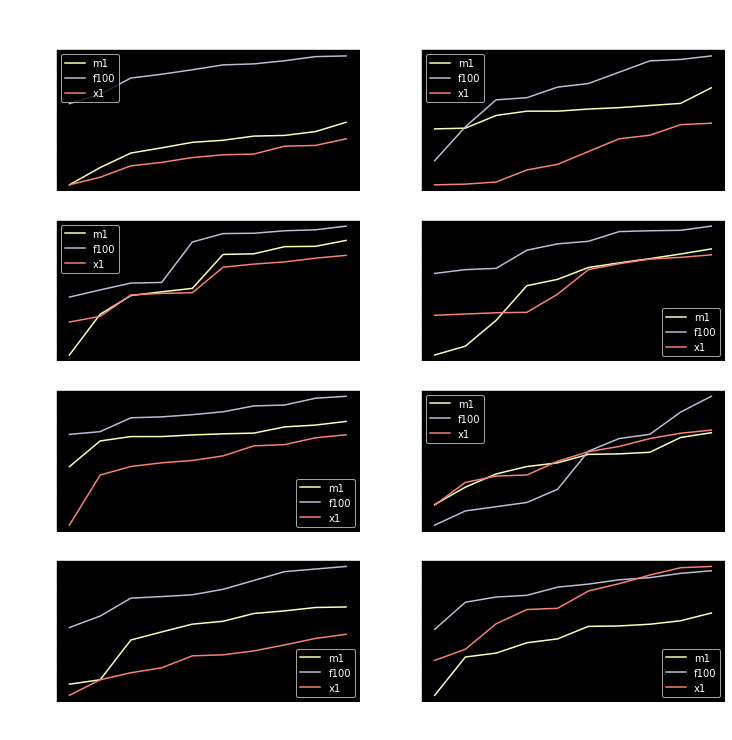

In [21]:
COLORS = {'m1': 'C1',
          'f100': 'C2',
          'x1': 'C3'}

RANKS = dict(zip(peptide_enegries.peptide, 
                 ['Top-1', 'Top-2', 'Bottom-2', 'Bottom-1']))

figure, axes = plt.subplots(nrows=4, ncols=2,
                            # sharey=True,
                            sharex=True,
                            figsize=(12, 12))

figure.suptitle('Binding Energies - HPEPDOCK and MDockPeP', y=0.93)

for column_index, docking_tool in enumerate(docking_tools):
    
    # axes[0, column_index].set_title(docking_tool)
    
    for row_index, peptide in enumerate(peptide_enegries.peptide):
        
        axes[row_index, column_index].set_title(RANKS[peptide] + ' - ' + peptide)
        
        axes[row_index, 0].set_ylabel('Energy')

        target_binding_energies = docking_results[(docking_results.tool == docking_tool) & 
                                                  (docking_results.peptide == peptide)]
        
        targets_energies = target_binding_energies.filter(regex='^target$|^model_')

        targets_energies.set_index('target', inplace=True)
        
        for target, target_energies in targets_energies.T.items():
            
            color = COLORS[target]

            axes[row_index, column_index].plot(target_energies.to_numpy(), label=target, color=color)
            
            axes[row_index, column_index].legend()

        # energies = target_binding_energies.filter(like='model_').to_numpy()

        # axes[row_index, column_index].plot(energies.T)
        # axes[row_index, column_index].xaxis.set_visible(False)

        # axes[row_index, column_index].axis('off')
        # axes[row_index, column_index].set_ylabel('Energy')
   
    axes[row_index, column_index].set_xlabel("Model")

#### Full Results

In [22]:
results_records = []

for fields, target in zip(target_dataset.fields, target_dataset.targets):
    
    symbols = target_dataset.decode(fields)
    
    results_record = {'symbols': symbols,
                      'target_binding_energy': target}
    
    results_records.append(results_record)

In [23]:
full_results = pd.DataFrame(results_records)
full_results = full_results.drop_duplicates()
full_results = full_results.sort_values('target_binding_energy', ignore_index=True)

full_results.head()

,symbols,target_binding_energy
0,QQEWEEQFYVNFRIGHLLNEYY,-16.462654
1,QQEWEEQFEVNFRIGHLLNEYY,-16.462654
2,IQEWCNQFNVLFRIGDLLNEYY,-16.462421
3,QQYWCEQFNVNPRIGHLLNEEY,-16.423288
4,QQYWEEQFYVNFRIGHLLNEYY,-16.404175


In [25]:
full_results.loc[full_results.symbols == 'QQEWEEQFYVNFRIGHLLNEYY']

,symbols,target_binding_energy
0,QQEWEEQFYVNFRIGHLLNEYY,-16.462654


In [113]:
# full_results.to_csv('results_15_12_2022.csv')

### 1.0) Train XGBoost Regressors

In [ ]:
# Train Regressors Classic

import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# MAX_DEPTH = 7
ESTIMATORS_COUNT = 1000


regressors = dict()
regressor_r2_scores = []

for dataset_name, dataset in datasets.items():
    
    print("dataset_name:", dataset_name)

    regressor = xgb.XGBRegressor(eval_metric=r2_score, 
                                 # max_depth=MAX_DEPTH, 
                                 n_estimators=ESTIMATORS_COUNT
                                )
    
    train_fields, test_fields, train_targets, test_targets = train_test_split(dataset.fields,
                                                                              dataset.targets,
                                                                              test_size=0.2)
    regressor.fit(train_fields, train_targets)
    
    regressors[dataset_name] = {'regressor': regressor}
    
    score = regressor.score(test_fields, test_targets)

    regressor_r2_scores.append(score)
    
print("regressor_r2_scores:", regressor_r2_scores)


# dataset_name: f100
# dataset_name: m1
# dataset_name: x1
# regressor_r2_scores: [0.40288274970605686, 0.6405254022927871, 0.5571315473724631]

# regressor_r2_scores: [0.5828579231036269, 0.8218700057365956, 0.5695950876325806, 0.49032957742570915]

In [ ]:
# # Save Regressors Classic

# with open('regressors_classic.pkl', 'wb') as handle:
#     pickle.dump(regressors, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 1.1) FM Models Comparison

#### Comparison - One Hot to One Cold

In [28]:
%run ../modules/fm.ipynb
%run ../modules/trainer.ipynb

dataset = ProteinsDataset(fields_column='protein')
dataset.extend('../chemistry/datasets/m1.csv')

splitter = Splitter(dataset, batch_size=100)

#### 1) One Hot

In [29]:
model = OneHotFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=False
)

one_hot_trainer = Trainer(splitter=splitter, model=model)

In [30]:
EPOCHS_COUNT = 300

one_hot_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_hot_scores = one_hot_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:35<00:00, 23.0k records/s, v=0.48]

Train r2_score: 0.77
Test  r2_score: 0.57


#### 2) One Hot + Linear

In [31]:
model = OneHotFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=True
)

one_hot_linear_trainer = Trainer(splitter=splitter, model=model)

In [32]:
EPOCHS_COUNT = 300

one_hot_linear_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_hot_linear_scores = one_hot_linear_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:48<00:00, 16.6k records/s, v=0.45]

Train r2_score: 0.70
Test  r2_score: 0.50


#### 3) One Cold

In [33]:
model = OneColdFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=False
)

one_cold_trainer = Trainer(splitter=splitter, model=model)

In [34]:
EPOCHS_COUNT = 300

one_cold_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_cold_scores = one_cold_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:25<00:00, 32.1k records/s, v=0.53]

Train r2_score: 0.76
Test  r2_score: 0.55


#### 4) One Cold + Linear

In [35]:
model = OneColdFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=True
)

one_cold_linear_trainer = Trainer(splitter=splitter, model=model)

In [36]:
EPOCHS_COUNT = 300

one_cold_linear_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_cold_linear_scores = one_cold_linear_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:30<00:00, 26.7k records/s, v=0.54]

Train r2_score: 0.76
Test  r2_score: 0.59


#### 5) Comparison Plot

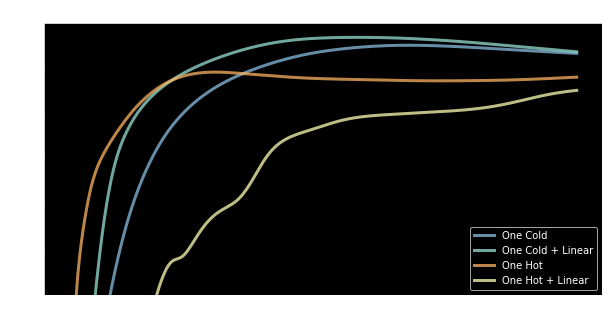

In [42]:
plt.subplots(figsize=(10, 5))

plt.plot(one_cold_scores, label='One Cold', color='C4', lw=3, alpha=0.8)
plt.plot(one_cold_linear_scores, label='One Cold + Linear', color='C0', lw=3, alpha=0.8)
plt.plot(one_hot_scores, label='One Hot', color='C5', lw=3, alpha=0.75)
plt.plot(one_hot_linear_scores, label='One Hot + Linear', color='C1', lw=3, alpha=0.75)

plt.ylim(ymin=0, ymax=0.6)
# plt.xlim(xmax=350)

plt.title("Validation R2 Score Evolution")
plt.xlabel("Epoch")
plt.ylabel("R2 Score")

plt.legend()
plt.show()